In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('vehicles.csv')

In [3]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [4]:
data.isnull().sum(axis = 0)

id                   0
url                  0
region               0
region_url           0
price                0
year               626
manufacturer     18549
model             5988
condition       179689
cylinders       160750
fuel              2829
odometer         73671
title_status      1664
transmission      2023
vin             192529
drive           118802
size            286405
type            114053
paint_color     131623
image_url           22
description         25
county          423984
state                0
lat               8075
long              8075
dtype: int64

In [11]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values

image_url           22
description         25
year               626
title_status      1664
transmission      2023
fuel              2829
model             5988
lat               8075
long              8075
manufacturer     18549
odometer         73671
type            114053
drive           118802
paint_color     131623
cylinders       160750
condition       179689
vin             192529
size            286405
county          423984
dtype: int64

In [12]:
missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index

In [14]:
import matplotlib.pyplot as plt

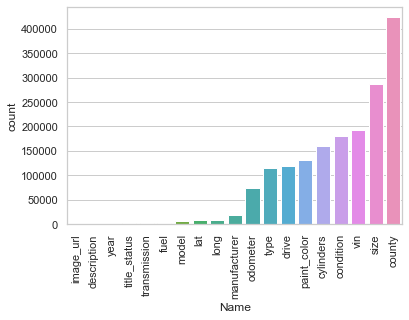

In [15]:
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

Fill in age missing value

In [17]:
median_age = np.median(data.year)

In [18]:
median_age

nan

In [25]:
x = list()

In [46]:
def fill(val, fill_in):
    
    if pd.isnull(val):
        return fill_in
    else:
        return val

In [27]:
for year in data['year']:
    if not pd.isnull(year):
        x.append(year)

In [28]:
median_age = np.median(x)

In [29]:
median_age

2012.0

In [34]:
x = data['year'].apply(fill_age, fill_in=median_age)

In [36]:
type(x)

pandas.core.series.Series

In [37]:
data['year'] = x

In [38]:
data.isnull().sum(axis = 0)['year']

0

In [39]:
data.isnull().sum(axis = 0)

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer     18549
model             5988
condition       179689
cylinders       160750
fuel              2829
odometer         73671
title_status      1664
transmission      2023
vin             192529
drive           118802
size            286405
type            114053
paint_color     131623
image_url           22
description         25
county          423984
state                0
lat               8075
long              8075
dtype: int64

In [40]:
data.drop('county', axis=1, inplace=True)

In [41]:
np.median(data.odometer)

nan

In [42]:
x = list()

In [43]:
for dist in data['odometer']:
    if not pd.isnull(dist):
        x.append(dist)

In [45]:
median_dist = np.median(x)

In [47]:
data['odometer'] = data['odometer'].apply(fill, fill_in=median_dist)

In [48]:
data.isnull().sum(axis = 0)['odometer']

0

In [49]:
def get_counts(data, column):
    
    #counts = dict()
    variable = data[column]
    counts = dict(variable.value_counts())
    return counts

In [50]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'state', 'lat', 'long'],
      dtype='object')

In [51]:
data.rename({'manufacturer':'make'}, axis=1, inplace=True)

In [62]:
#make_counts = get_counts(data, 'make')
make_mode = 'ford'
data['make'] = data['make'].apply(fill, fill_in='ford')

In [63]:
data.isnull().sum(axis = 0)['make']

0

In [65]:
data.isnull().sum(axis = 0)['model']

5988

In [66]:
makes = list(data['make'])
models = list(data['model'])

In [69]:
no_info = list()
for i in range(0, len(makes)):
    if pd.isnull(models[i]):
        no_info.append(i)

In [70]:
no_info

[5,
 22,
 64,
 124,
 151,
 312,
 525,
 569,
 648,
 831,
 877,
 1257,
 1268,
 1304,
 1325,
 1394,
 1586,
 1646,
 1780,
 1803,
 1927,
 2128,
 2141,
 2437,
 2524,
 2529,
 2551,
 2602,
 2632,
 2635,
 2871,
 2872,
 2917,
 2918,
 3024,
 3059,
 3184,
 3350,
 3367,
 3549,
 3760,
 3894,
 4027,
 4092,
 4205,
 4295,
 4331,
 4345,
 4351,
 4355,
 4360,
 4385,
 4487,
 4515,
 4520,
 4650,
 4668,
 4741,
 4767,
 4859,
 4882,
 4891,
 4904,
 4920,
 4934,
 5091,
 5103,
 5131,
 5134,
 5168,
 5171,
 5329,
 5398,
 5543,
 5658,
 5775,
 5859,
 6001,
 6014,
 6026,
 6041,
 6224,
 6249,
 6462,
 6487,
 6518,
 6531,
 6580,
 6613,
 6718,
 6750,
 6834,
 6841,
 6903,
 6995,
 7052,
 7082,
 7489,
 7512,
 7513,
 7659,
 7671,
 7815,
 7978,
 7980,
 8051,
 8161,
 8190,
 8293,
 8339,
 8349,
 8705,
 8707,
 8966,
 9099,
 9305,
 9426,
 9599,
 9646,
 9778,
 9821,
 9854,
 10056,
 10085,
 10219,
 10222,
 10264,
 10298,
 10653,
 10773,
 10871,
 10881,
 10891,
 10911,
 10912,
 11319,
 11327,
 11605,
 11697,
 11729,
 11951,
 11973,
 

In [71]:
data.loc[5, 'make']

'ford'

In [85]:
def get_make_popular_model(make):
    
    return data.groupby('make').get_group(make)['model'].value_counts().index[0]
    

In [86]:
get_make_popular_model('ford')

'f-150'

In [89]:
make_best_model = dict()
for make in data['make'].value_counts().index:
    make_best_model[make] = get_make_popular_model(make)

In [91]:
for i in range(0, len(models)):
    if pd.isnull(models[i]):
        models[i] = make_best_model[makes[i]]


In [92]:
data['model'] = models

In [93]:
data.isnull().sum(axis = 0)['model']

0

In [94]:
data.isnull().sum(axis = 0)

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
make                 0
model                0
condition       179689
cylinders       160750
fuel              2829
odometer             0
title_status      1664
transmission      2023
vin             192529
drive           118802
size            286405
type            114053
paint_color     131623
image_url           22
description         25
state                0
lat               8075
long              8075
dtype: int64

In [95]:
data.condition.value_counts()

excellent    116141
good          92947
like new      26431
fair           6958
new            1123
salvage         695
Name: condition, dtype: int64

In [96]:
data['condition'] = data['condition'].apply(fill, fill_in='excellent')

In [97]:
data.isnull().sum(axis = 0)['condition']

0

In [98]:
data.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
make             object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
vin              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
state            object
lat             float64
long            float64
dtype: object

In [99]:
data.cylinders.value_counts()

6 cylinders     93704
4 cylinders     85818
8 cylinders     78173
5 cylinders      2412
10 cylinders     1497
other             972
3 cylinders       527
12 cylinders      131
Name: cylinders, dtype: int64

In [100]:
data['cylinders'] = data['cylinders'].apply(fill, fill_in='6 cylinders')

In [101]:
data.isnull().sum(axis = 0)['cylinders']

0

In [102]:
data.fuel.value_counts()

gas         370007
diesel       33224
other        12847
hybrid        4234
electric       843
Name: fuel, dtype: int64

In [103]:
data['fuel'] = data['fuel'].apply(fill, fill_in='gas')

In [110]:
data.title_status.value_counts()

clean         403138
rebuilt        11579
salvage         5535
lien            2688
missing          757
parts only       287
Name: title_status, dtype: int64

In [109]:
x = list(data['title_status'])
for status in range (0,len(x)):
    if x[status] == 'gas':
        x[status] = 'clean'
data['title_status'] = x        
#data['title_status'] = data['title_status'].apply(fill, fill_in='clean')

In [106]:
data.isnull().sum(axis = 0)

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
make                 0
model                0
condition            0
cylinders            0
fuel                 0
odometer             0
title_status         0
transmission      2023
vin             192529
drive           118802
size            286405
type            114053
paint_color     131623
image_url           22
description         25
state                0
lat               8075
long              8075
dtype: int64

In [107]:
data.transmission.value_counts()

automatic    376920
manual        27970
other         17071
Name: transmission, dtype: int64

In [111]:
data['transmission'] = data['transmission'].apply(fill, fill_in='automatic')

In [112]:
data.drop('vin', inplace=True, axis=1)

In [113]:
data.drive.value_counts()

4wd    136072
fwd    110886
rwd     58224
Name: drive, dtype: int64

In [114]:
data['drive'] = data['drive'].apply(fill, fill_in='4wd')

In [116]:
data['size'].value_counts()

full-size      73692
mid-size       39949
compact        20788
sub-compact     3150
Name: size, dtype: int64

In [117]:
data['size'] = data['size'].apply(fill, fill_in='full-size')

In [118]:
data.isnull().sum(axis = 0)

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
make                 0
model                0
condition            0
cylinders            0
fuel                 0
odometer             0
title_status         0
transmission         0
drive                0
size                 0
type            114053
paint_color     131623
image_url           22
description         25
state                0
lat               8075
long              8075
dtype: int64

In [120]:
data.type.value_counts()

sedan          79345
SUV            78618
pickup         38510
truck          37364
coupe          16500
other          12395
hatchback      12356
wagon           9842
van             9822
convertible     8197
mini-van        5892
offroad          624
bus              466
Name: type, dtype: int64

In [ ]:
data['size'] = data['size'].apply(fill, fill_in='full-size')

In [121]:
import random

In [127]:
types = list(data.type)
for i in range(0, len(types)):
    if pd.isnull(types[i]):
        if random.randint(0,1) == 0:
            types[i] = 'sedan'
        else:
            types[i] = 'SUV'

In [128]:
data['type'] = types

In [129]:
data.isnull().sum(axis = 0)['type']

0

In [130]:
data.isnull().sum(axis = 0)

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
make                 0
model                0
condition            0
cylinders            0
fuel                 0
odometer             0
title_status         0
transmission         0
drive                0
size                 0
type                 0
paint_color     131623
image_url           22
description         25
state                0
lat               8075
long              8075
dtype: int64

In [131]:
data.paint_color.value_counts()

white     77144
black     57404
silver    44104
blue      29969
grey      29730
red       28375
green      7469
custom     7116
brown      6467
yellow     2016
orange     1857
purple      710
Name: paint_color, dtype: int64

In [132]:
data['paint_color'] = data['paint_color'].apply(fill, fill_in='black')

In [134]:
data.drop(['image_url','lat', 'long'], axis=1, inplace=True)

In [135]:
data.to_csv('vehicles.csv', index=False)